# Embeddings Visualization with PCA and T-SNE

In [3]:
from bokeh.layouts import column, row
from bokeh.models import Select
from bokeh.palettes import Spectral5
from bokeh.plotting import curdoc, figure
from bokeh.sampledata.autompg import autompg_clean as df

In [74]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import seaborn as sns

In [75]:
import pandas as pd

In [5]:
## Load pretrained words 
path = '/Users/cblanesg/Downloads/GoogleNews-vectors-negative300.bin'
model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)

In [6]:
## Make your clusters for visualization and append embedding values
keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor', 'delivery', 'election', 'expensive','experience', 'financial', 'food', 'iOS', 'peace', 'release', 'war']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

# T-SNE 

In [15]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

In [20]:
tsne_values = tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))

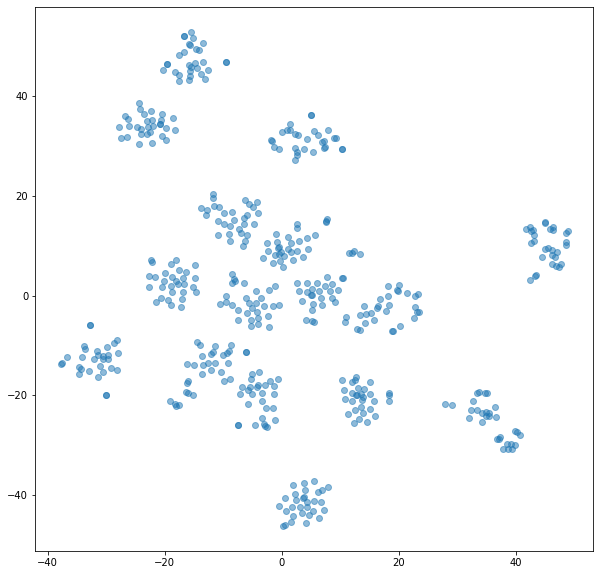

In [23]:
FS = (10, 10)
fig, ax = plt.subplots(figsize=FS)
ax.scatter(tsne_values[:,0],tsne_values[:,1], alpha=.5)

In [24]:
cl = cluster.AgglomerativeClustering(10)
cl.fit(tsne_representation);

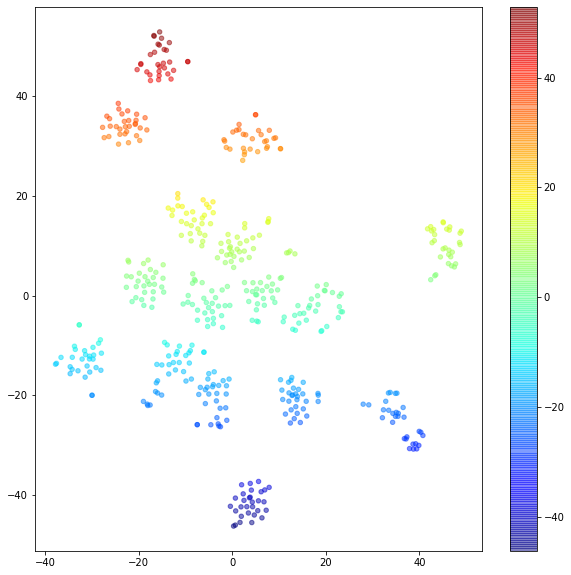

In [35]:
plt.figure(figsize=(10,10))
cmap = plt.cm.get_cmap('jet')
plt.scatter(tsne_values[:,0],tsne_values[:,1], 
            alpha=0.5, c = tsne_values[:,1], cmap=cmap, s=20)
plt.colorbar()

In [161]:
def tsne_plot(keys, embedding_clusters):
    figsize = (20,20)
    fig, ax = plt.subplots(figsize=FS)
    colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", '#dbe9f6', '#bad6eb', '#89bedc', 
'#539ecd', '#2b7bba', '#0b559f', "#9b59b6", "#3498db", "#95a5a6", "#e74c3c"]
    for label, coords, color in zip(keys, embedding_clusters, colors):
        x = coords[:,0]
        y = coords[:,1]
        plt.scatter(x,y, c = color, alpha = 0.5, label = label)
    plt.legend()
    plt.show()

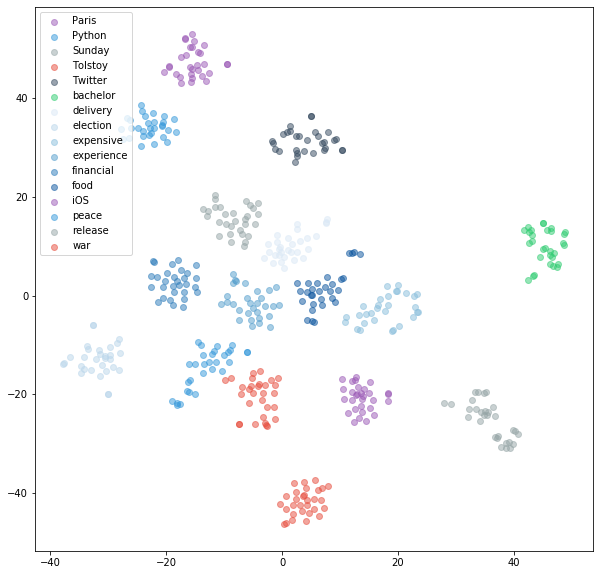

In [163]:
tsne_plot(keys, embeddings_en_2d)

# PCA

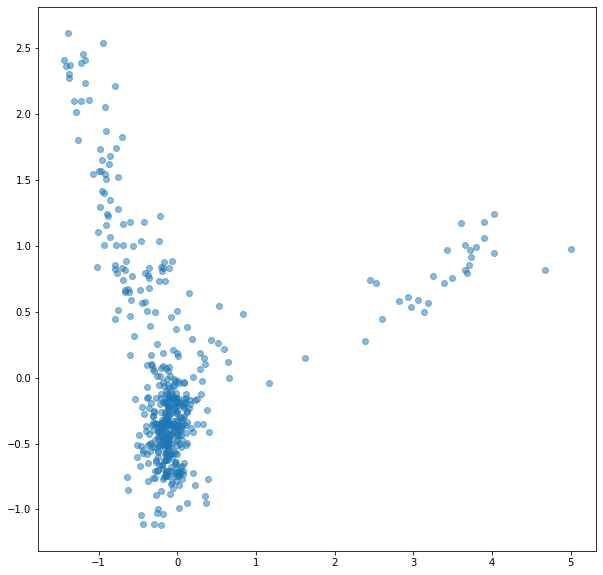

In [168]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = PCA(n_components=2)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

pca_values = tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))

FS = (10, 10)
fig, ax = plt.subplots(figsize=FS)
ax.scatter(pca_values[:,0],pca_values[:,1], alpha=.5)

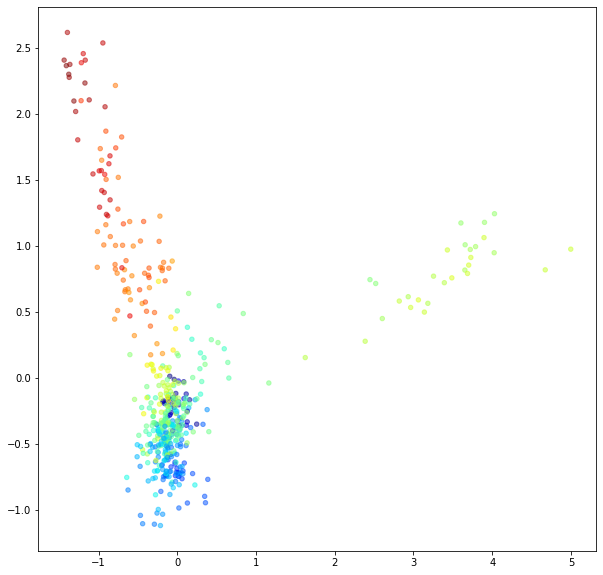

In [170]:
plt.figure(figsize=(10,10))
cmap = plt.cm.get_cmap('jet')
plt.scatter(pca_values[:,0],pca_values[:,1], 
            alpha=0.5, c = tsne_values[:,1], cmap=cmap, s=20)

# Ploty: Interactive plots

In [1]:
# Plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [8]:
embedding_clsusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=1, init='pca', n_iter=3500, random_state=32)

In [16]:
embeddings_en_1d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 1)

In [20]:
y_axis = [0]*30

In [68]:
cluster1_embs = []
for i in range(len(embeddings_en_1d[0].tolist())):
    cluster1_embs.append(embeddings_en_1d[0].tolist()[i][0])
    
cluster2_embs = []
for i in range(len(embeddings_en_1d[1].tolist())):
    cluster2_embs.append(embeddings_en_1d[1].tolist()[i][0])
    
cluster3_embs = []
for i in range(len(embeddings_en_1d[2].tolist())):
    cluster3_embs.append(embeddings_en_1d[2].tolist()[i][0])

In [71]:
cluster1 = pd.DataFrame({'PC1_1d': cluster1_embs})
cluster2 = pd.DataFrame({'PC1_1d': cluster2_embs})
cluster3 = pd.DataFrame({'PC1_1d': cluster3_embs})

In [73]:
trace1 = go.Scatter(
                    x = cluster1['PC1_1d'],
                    y = y_axis,
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

trace2 = go.Scatter(
                    x = cluster2['PC1_1d'],
                    y = y_axis,
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

trace3 = go.Scatter(
                    x = cluster3['PC1_1d'],
                    y = y_axis,
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

In [76]:
data = [trace1, trace2, trace3]
title = "Visualizing Clusters in One Dimension Using T-SNE"

In [77]:
layout = dict(title = title,
              xaxis= dict(title= 'TSNE',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [79]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

In [120]:
name_cluster1 = pd.DataFrame({'PC_name': word_clusters[0]})
name_cluster2 = pd.DataFrame({'PC_name': word_clusters[1]})
name_cluster3 = pd.DataFrame({'PC_name': word_clusters[2]})

In [97]:
x_clus1 = []
y_clus1 = []
for i in range(len(embeddings_en_2d[0].tolist())):
    x_clus1.append(embeddings_en_2d[0].tolist()[i][0])
    y_clus1.append(embeddings_en_2d[0].tolist()[i][1])

In [98]:
x_clus2 = []
y_clus2 = []
for i in range(len(embeddings_en_2d[1].tolist())):
    x_clus2.append(embeddings_en_2d[1].tolist()[i][0])
    y_clus2.append(embeddings_en_2d[1].tolist()[i][1])

In [107]:
x_clus3 = []
y_clus3 = []
for i in range(len(embeddings_en_2d[2].tolist())):
    x_clus3.append(embeddings_en_2d[2].tolist()[i][0])
    y_clus3.append(embeddings_en_2d[2].tolist()[i][1])

In [108]:
cluster1 = pd.DataFrame({'PC1_2d': x_clus1, 'PC2_2d':y_clus1})
cluster2 = pd.DataFrame({'PC1_2d': x_clus2, 'PC2_2d':y_clus2})
cluster3 = pd.DataFrame({'PC1_2d': x_clus3, 'PC2_2d':y_clus3})

In [129]:
trace1 = go.Scatter(
                    x = cluster1['PC1_2d'],
                    y = cluster1['PC2_2d'],
                    mode = "markers",
                    name = "Cluster Paris",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = name_cluster1['PC_name'])

trace2 = go.Scatter(
                    x = cluster2['PC1_2d'],
                    y = cluster2['PC2_2d'],
                    mode = "markers",
                    name = "Cluster Python",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = name_cluster2['PC_name'])

trace3 = go.Scatter(
                    x = cluster3['PC1_2d'],
                    y = cluster3['PC2_2d'],
                    mode = "markers",
                    name = "Cluster Sunday",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = name_cluster3['PC_name'])

In [130]:
data = [trace1, trace2, trace3]
title = "Visualizing Clusters in Two Dimensions Using T-SNE"

In [132]:
layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)